# 타 국가의 은행 파산이 국내 금융지주사에 미치는 영향

공변량 후보: 미국, 한국(환율, 경제 성장률, GDP, 금리, 주식지수)

환율 USD, KRW, USD/KRW  V

주식 지수: KOSPI, KRX100, DJI 

무역 거래량? 외교지수?

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
from datetime import datetime, timedelta
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings('ignore')

In [2]:
# KS11 (KOSPI 지수), 2022년~현재
df = fdr.DataReader('KS11', '2022')
df = pd.DataFrame(df)
x = pd.DataFrame(df['Close'])
x

,Close
Date,
2022-01-04,2989.239990
2022-01-05,2953.969971
2022-01-06,2920.530029
2022-01-07,2954.889893
2022-01-10,2926.719971
...,...
2023-08-18,2504.500000
2023-08-21,2508.800049
2023-08-22,2515.739990


In [3]:
df1 = fdr.DataReader('105560', '2021') #KB
df1 = pd.DataFrame(df1)
df1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,43150,43150,42150,42450,2825436,-0.021889
2021-01-05,42600,43750,41900,43550,3108053,0.025913
2021-01-06,43850,44700,43350,44000,3637798,0.010333
2021-01-07,45550,46300,45300,46000,4683821,0.045455
2021-01-08,46800,46800,45550,46500,3696066,0.010870
...,...,...,...,...,...,...
2023-08-18,51200,52400,51200,52000,925427,0.003861
2023-08-21,52200,52600,51600,51800,765929,-0.003846
2023-08-22,52000,52400,51700,52200,737242,0.007722


In [4]:
df2 = fdr.DataReader('316140', '2021') #우리
df2 = pd.DataFrame(df2)
df2

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,9600,9700,9510,9510,2227495,-0.022610
2021-01-05,9530,9630,9410,9610,2318934,0.010515
2021-01-06,9590,9730,9450,9580,3594459,-0.003122
2021-01-07,9800,9920,9720,9840,4155453,0.027140
2021-01-08,9900,9920,9730,9910,3068580,0.007114
...,...,...,...,...,...,...
2023-08-18,11260,11430,11250,11380,1488682,0.001761
2023-08-21,11400,11500,11360,11460,1652738,0.007030
2023-08-22,11460,11510,11420,11450,1265428,-0.000873


In [5]:
df3 = fdr.DataReader('086790', '2021') #하나
df3 = pd.DataFrame(df3)
df3

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,34000,34050,33250,33450,2312196,-0.030435
2021-01-05,33250,34100,32750,34050,2441785,0.017937
2021-01-06,34150,35300,33900,34750,3379422,0.020558
2021-01-07,36000,36800,35650,36800,4379391,0.058993
2021-01-08,37100,37900,36450,37700,3631187,0.024457
...,...,...,...,...,...,...
2023-08-18,37950,38150,37500,37550,1277687,-0.011842
2023-08-21,37750,38450,37650,38050,1408890,0.013316
2023-08-22,38000,38200,37800,38100,597439,0.001314


In [6]:
df4 = fdr.DataReader('055550', '2021') #신한
df4 = pd.DataFrame(df4)
df4

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,32050,32050,31500,31550,2983516,-0.015601
2021-01-05,31500,32250,31200,32100,3411233,0.017433
2021-01-06,32200,32800,31950,32400,4751214,0.009346
2021-01-07,33500,33900,33300,33750,6546753,0.041667
2021-01-08,34200,34250,33250,33650,4748235,-0.002963
...,...,...,...,...,...,...
2023-08-18,34500,35300,34500,34800,938684,0.001439
2023-08-21,35150,35350,34900,35100,864600,0.008621
2023-08-22,34950,35200,34850,34950,712316,-0.004274


In [7]:
df5 = fdr.DataReader('139130', '2021') #DGB
df5 = pd.DataFrame(df5)
df5

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,6800,6850,6610,6660,1034781,-0.019146
2021-01-05,6650,6790,6620,6780,956497,0.018018
2021-01-06,6770,6840,6700,6800,948272,0.002950
2021-01-07,6960,7250,6880,7200,1870252,0.058824
2021-01-08,7230,7320,6890,7230,1103273,0.004167
...,...,...,...,...,...,...
2023-08-18,7200,7370,7200,7330,485738,0.009642
2023-08-21,7350,7350,7240,7280,237761,-0.006821
2023-08-22,7290,7340,7240,7310,232169,0.004121


In [8]:
df6 = fdr.DataReader('138930', '2021') #BNK
df6 = pd.DataFrame(df6)
df6

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,5650,5660,5510,5560,2067437,-0.021127
2021-01-05,5510,5590,5480,5580,2758276,0.003597
2021-01-06,5590,5670,5520,5570,6467687,-0.001792
2021-01-07,5720,5790,5670,5780,3856777,0.037702
2021-01-08,5830,5840,5710,5780,3213667,0.000000
...,...,...,...,...,...,...
2023-08-18,6530,6660,6510,6600,794460,0.001517
2023-08-21,6600,6630,6560,6580,387787,-0.003030
2023-08-22,6580,6600,6550,6560,461505,-0.003040


In [9]:
df7 = fdr.DataReader('175330', '2021') #JB
df7 = pd.DataFrame(df7)
df7

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,5640,5650,5440,5480,712462,-0.028369
2021-01-05,5540,5590,5450,5590,538026,0.020073
2021-01-06,5610,5630,5490,5520,605600,-0.012522
2021-01-07,5650,5720,5610,5680,973122,0.028986
2021-01-08,5750,5760,5670,5710,633366,0.005282
...,...,...,...,...,...,...
2023-08-18,8520,8680,8520,8640,192698,0.002320
2023-08-21,8700,8700,8600,8630,164562,-0.001157
2023-08-22,8630,8690,8590,8640,215024,0.001159


In [10]:
dfs = []  # DataFrame들을 저장할 리스트

for i in range(1, 5):
    df = eval('df{}'.format(i))  # 직접 DataFrame에 접근
    dfs.append(df['Close'])  # 'Close' 열을 리스트에 추가

# DataFrame들을 병합
merged_df = dfs[0]  # 첫 번째 DataFrame으로 시작
for i in range(1, len(dfs)):
    merged_df = pd.merge(merged_df, dfs[i], on='Date', how='inner')

# 병합된 DataFrame 출력
merged_df

,Close_x,Close_y,Close_x,Close_y
Date,,,,
2021-01-04,42450,9510,33450,31550
2021-01-05,43550,9610,34050,32100
2021-01-06,44000,9580,34750,32400
2021-01-07,46000,9840,36800,33750
2021-01-08,46500,9910,37700,33650
...,...,...,...,...
2023-08-18,52000,11380,37550,34800
2023-08-21,51800,11460,38050,35100
2023-08-22,52200,11450,38100,34950


In [11]:
# 열 이름에 숫자를 붙여 변경
new_columns = [f'Close_{i+1}' for i in range(len(merged_df.columns))]
merged_df.columns = new_columns

# 변경된 열 이름 확인
print(merged_df.columns)
merged_df = pd.DataFrame(merged_df)

Index(['Close_1', 'Close_2', 'Close_3', 'Close_4'], dtype='object')


In [12]:
merged_df.to_csv('merged_df1.csv')

In [13]:
x.reset_index(inplace=True)
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date')
x

,Date,Close
0,2022-01-04,2989.239990
1,2022-01-05,2953.969971
2,2022-01-06,2920.530029
3,2022-01-07,2954.889893
4,2022-01-10,2926.719971
...,...,...
400,2023-08-18,2504.500000
401,2023-08-21,2508.800049
402,2023-08-22,2515.739990
403,2023-08-23,2505.500000


In [14]:
merged_df.reset_index(inplace=True)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date')
merged_df

,Date,Close_1,Close_2,Close_3,Close_4
0,2021-01-04,42450,9510,33450,31550
1,2021-01-05,43550,9610,34050,32100
2,2021-01-06,44000,9580,34750,32400
3,2021-01-07,46000,9840,36800,33750
4,2021-01-08,46500,9910,37700,33650
...,...,...,...,...,...
650,2023-08-18,52000,11380,37550,34800
651,2023-08-21,51800,11460,38050,35100
652,2023-08-22,52200,11450,38100,34950
653,2023-08-23,52600,11570,38800,35050


In [15]:
# 주중, 주말 및 공휴일 설정
weekmask = 'Mon Tue Wed Thu Fri'
weekend = ['Sat', 'Sun']  # 주말 설정
today = datetime.now()
tomorrow = today + timedelta(1)
holidays = pd.to_datetime(['2023-01-01', tomorrow])  # 공휴일 날짜 설정
today = today.strftime('%Y-%m-%d')

# CustomBusinessDay 객체 생성
custom_business_day = CustomBusinessDay(weekmask=weekmask, holidays=holidays, calendar=weekend)

# 주말과 공휴일을 포함한 모든 비즈니스 데이 날짜 생성
business_dates = pd.date_range(start=merged_df['Date'].min(), end=merged_df['Date'].max(), freq=custom_business_day)

# 주말과 공휴일을 포함한 모든 날짜로 데이터프레임 재생성
merged_df.set_index('Date', inplace=True)  # 인덱스 재설정
merged_df = merged_df.reindex(business_dates)

x.set_index('Date', inplace=True)
x = x.reindex(business_dates)

# 결측치를 이전 유효한 값으로 채우기
merged_df = merged_df.fillna(method='ffill')

x = x.fillna(method='bfill')

# 변경된 데이터프레임 출력
merged_df

,Close_1,Close_2,Close_3,Close_4
2021-01-04,42450.0,9510.0,33450.0,31550.0
2021-01-05,43550.0,9610.0,34050.0,32100.0
2021-01-06,44000.0,9580.0,34750.0,32400.0
2021-01-07,46000.0,9840.0,36800.0,33750.0
2021-01-08,46500.0,9910.0,37700.0,33650.0
...,...,...,...,...
2023-08-18,52000.0,11380.0,37550.0,34800.0
2023-08-21,51800.0,11460.0,38050.0,35100.0
2023-08-22,52200.0,11450.0,38100.0,34950.0
2023-08-23,52600.0,11570.0,38800.0,35050.0


In [16]:
x

,Close
2021-01-04,2989.239990
2021-01-05,2989.239990
2021-01-06,2989.239990
2021-01-07,2989.239990
2021-01-08,2989.239990
...,...
2023-08-18,2504.500000
2023-08-21,2508.800049
2023-08-22,2515.739990
2023-08-23,2505.500000


In [17]:
merged_df.columns = ['KB', '우리', '하나', '신한']
merged_df

,KB,우리,하나,신한
2021-01-04,42450.0,9510.0,33450.0,31550.0
2021-01-05,43550.0,9610.0,34050.0,32100.0
2021-01-06,44000.0,9580.0,34750.0,32400.0
2021-01-07,46000.0,9840.0,36800.0,33750.0
2021-01-08,46500.0,9910.0,37700.0,33650.0
...,...,...,...,...
2023-08-18,52000.0,11380.0,37550.0,34800.0
2023-08-21,51800.0,11460.0,38050.0,35100.0
2023-08-22,52200.0,11450.0,38100.0,34950.0
2023-08-23,52600.0,11570.0,38800.0,35050.0


In [18]:
merged_df.to_csv('merged_df.csv')

In [19]:
# SVB 파산
pre_period = ['2021-01-04', '2023-03-09']
post_period = ['2023-03-10', today]

In [20]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-5252.46%,-9.7%,0.0
우리,-1004.95%,-7.95%,0.0
하나,-5706.89%,-12.37%,0.0
신한,-4269.89%,-10.92%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48887.08           5866450.0
Prediction (s.d.)         54139.55 (632.43)  6496745.42 (75891.89)
95% CI                    [52861.54, 55340.63][6343385.03, 6640875.76]

Absolute effect (s.d.)    -5252.46 (632.43)  -630295.42 (75891.89)
95% CI                    [-6453.55, -3974.46][-774425.76, -476935.03]

Relative effect (s.d.)    -9.7% (1.17%)      -9.7% (1.17%)
95% CI                    [-11.92%, -7.34%]  [-11.92%, -7.34%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


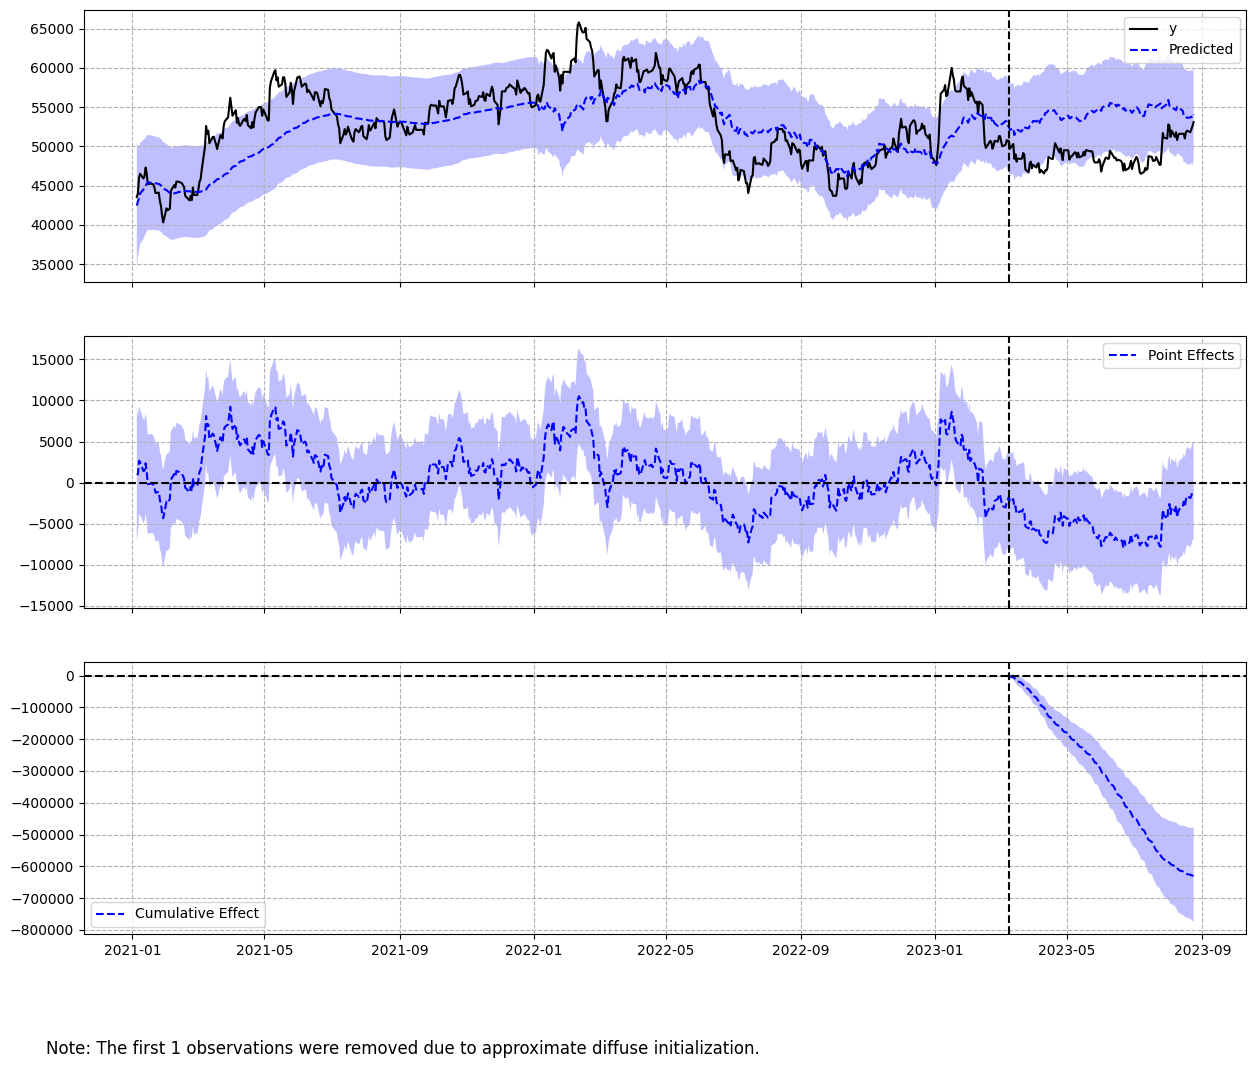

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11629.33           1395520.0
Prediction (s.d.)         12634.28 (153.52)  1516114.01 (18421.82)
95% CI                    [12339.75, 12941.52][1480770.44, 1552982.64]

Absolute effect (s.d.)    -1004.95 (153.52)  -120594.01 (18421.82)
95% CI                    [-1312.19, -710.42][-157462.64, -85250.44]

Relative effect (s.d.)    -7.95% (1.22%)     -7.95% (1.22%)
95% CI                    [-10.39%, -5.62%]  [-10.39%, -5.62%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


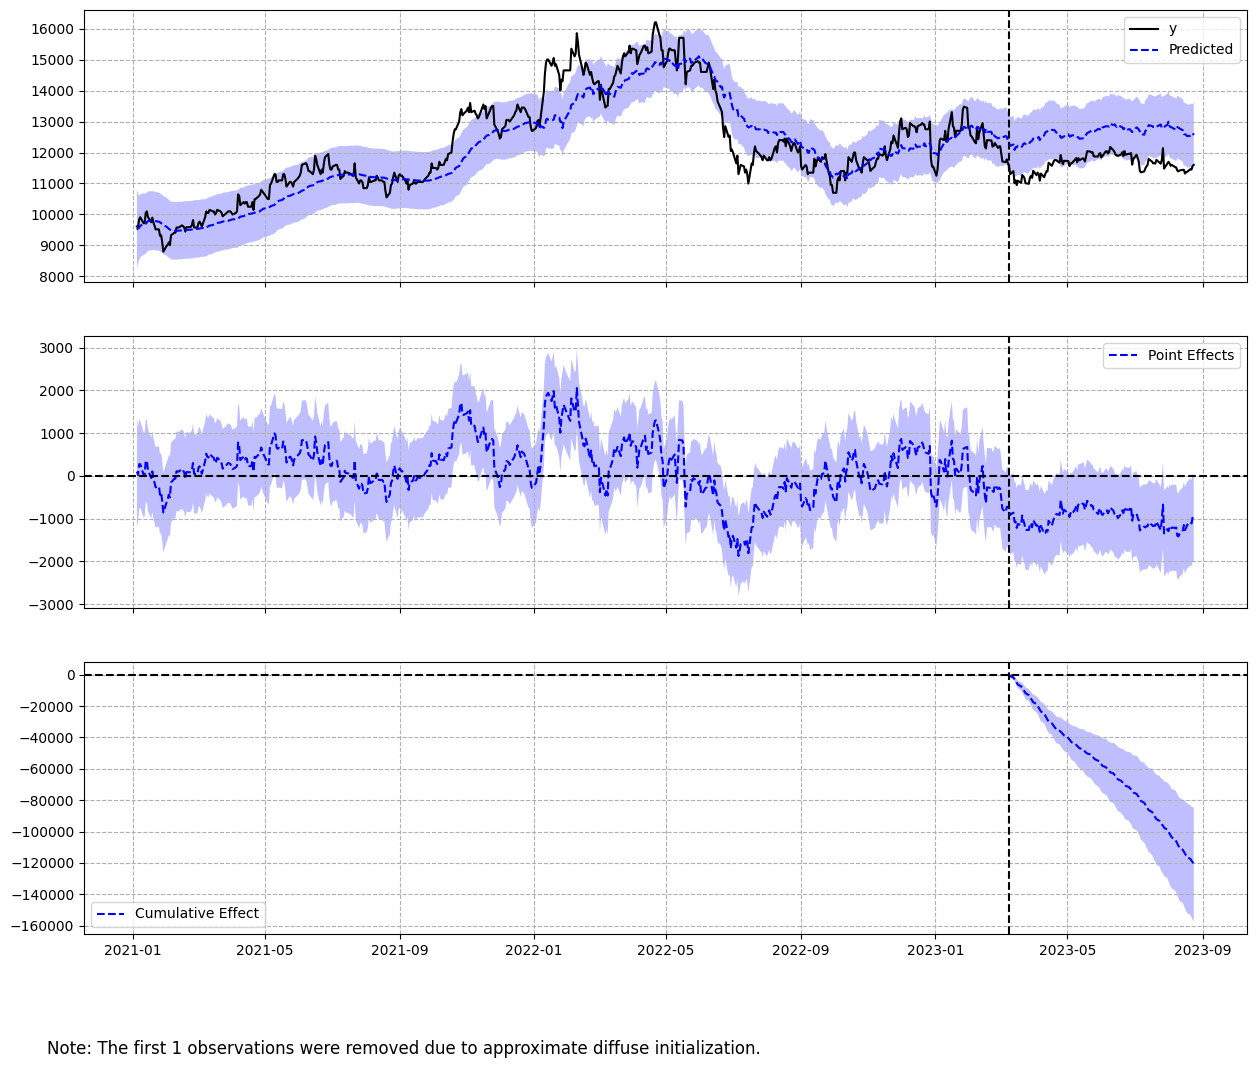

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    40430.83           4851700.0
Prediction (s.d.)         46137.72 (499.87)  5536526.84 (59984.74)
95% CI                    [45145.49, 47104.95][5417458.49, 5652594.35]

Absolute effect (s.d.)    -5706.89 (499.87)  -684826.84 (59984.74)
95% CI                    [-6674.12, -4714.65][-800894.35, -565758.49]

Relative effect (s.d.)    -12.37% (1.08%)    -12.37% (1.08%)
95% CI                    [-14.47%, -10.22%] [-14.47%, -10.22%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


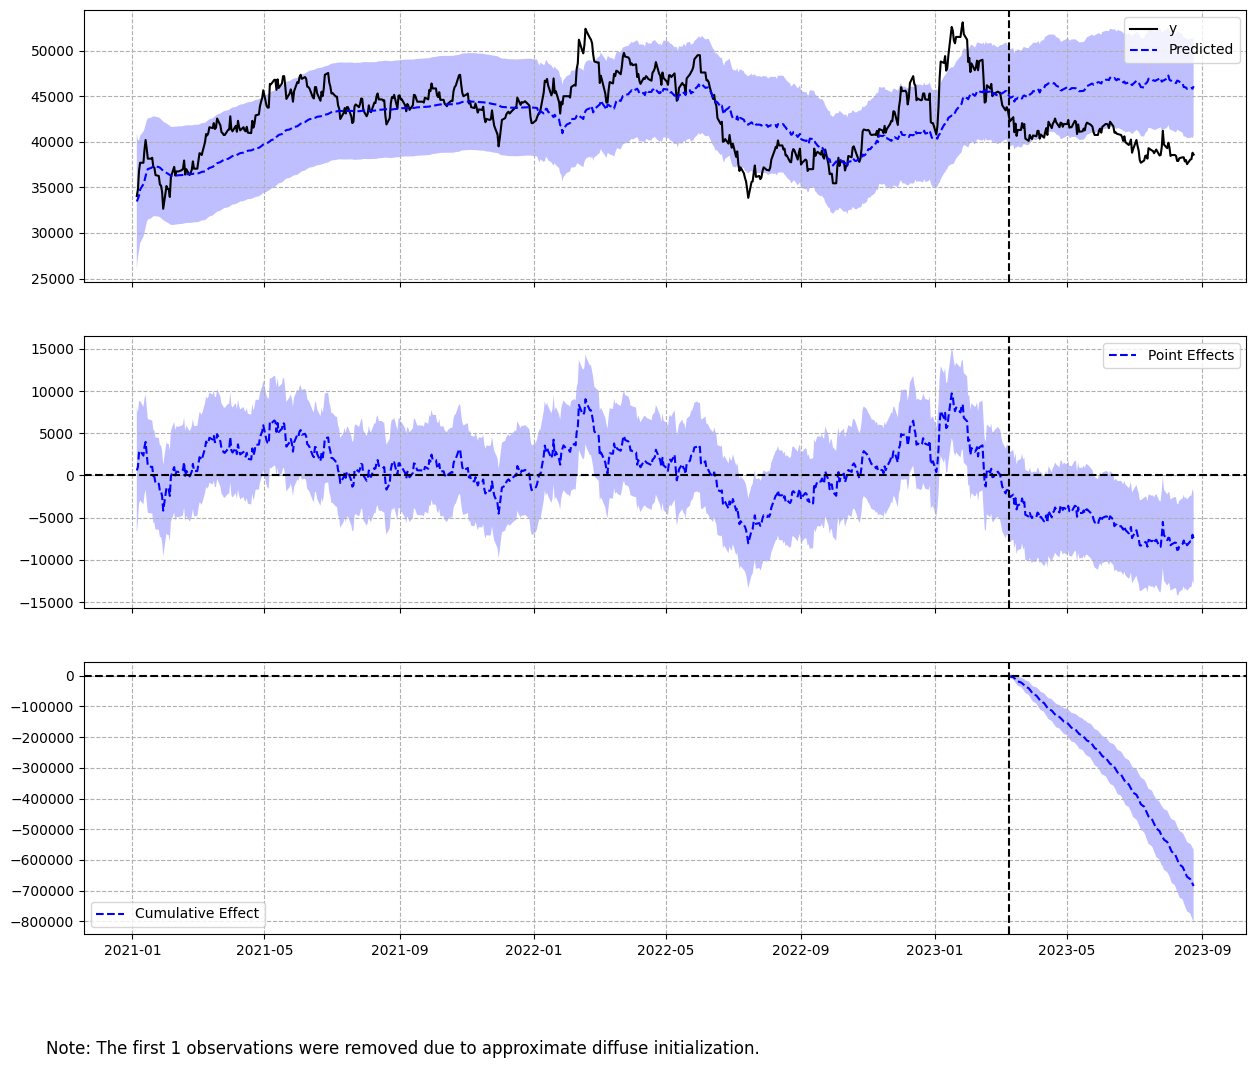

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    34820.0            4178400.0
Prediction (s.d.)         39089.89 (361.01)  4690786.89 (43320.82)
95% CI                    [38389.46, 39804.58][4606734.84, 4776549.34]

Absolute effect (s.d.)    -4269.89 (361.01)  -512386.89 (43320.82)
95% CI                    [-4984.58, -3569.46][-598149.34, -428334.84]

Relative effect (s.d.)    -10.92% (0.92%)    -10.92% (0.92%)
95% CI                    [-12.75%, -9.13%]  [-12.75%, -9.13%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


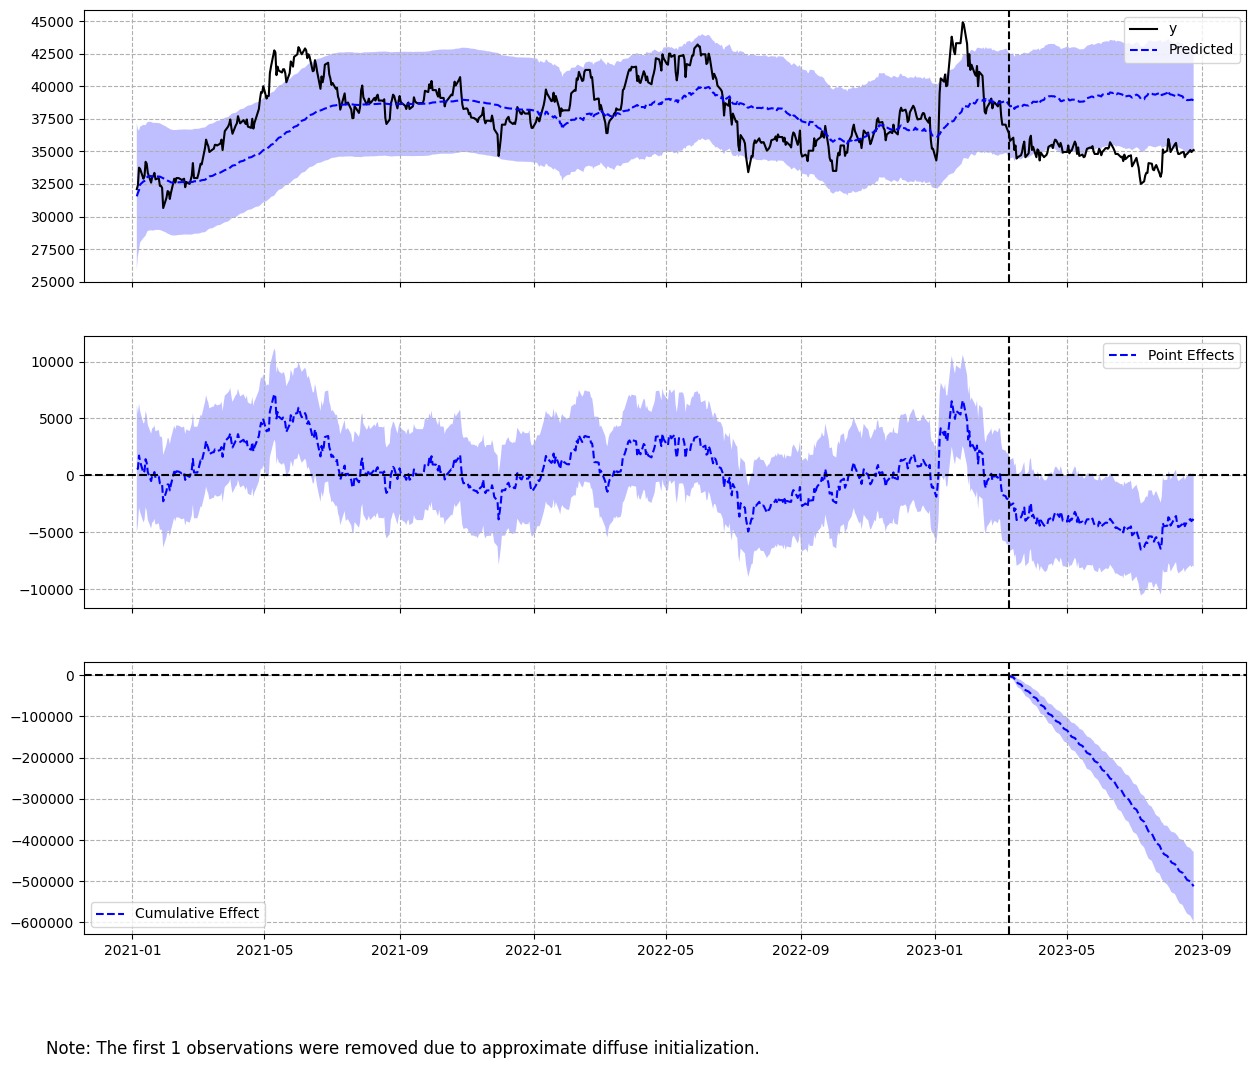

____________________________________________________________________________________________________


In [21]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            cl = pd.DataFrame(row).join(x, how='left')
        ci_c = CausalImpact(cl, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [22]:
# 거리두기 해제
pre_period = ['2021-01-04', '2022-04-18']
post_period = ['2022-04-19', today]

In [23]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-11588.7%,-18.6%,0.0
우리,-3482.71%,-22.08%,0.0
하나,-8284.28%,-16.49%,0.0
신한,-3318.02%,-8.23%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    50701.13           17897500.0
Prediction (s.d.)         62289.83 (816.31)  21988310.47 (288158.26)
95% CI                    [60582.68, 63782.57][21385685.93, 22515245.57]

Absolute effect (s.d.)    -11588.7 (816.31)  -4090810.47 (288158.26)
95% CI                    [-13081.43, -9881.55][-4617745.57, -3488185.93]

Relative effect (s.d.)    -18.6% (1.31%)     -18.6% (1.31%)
95% CI                    [-21.0%, -15.86%]  [-21.0%, -15.86%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


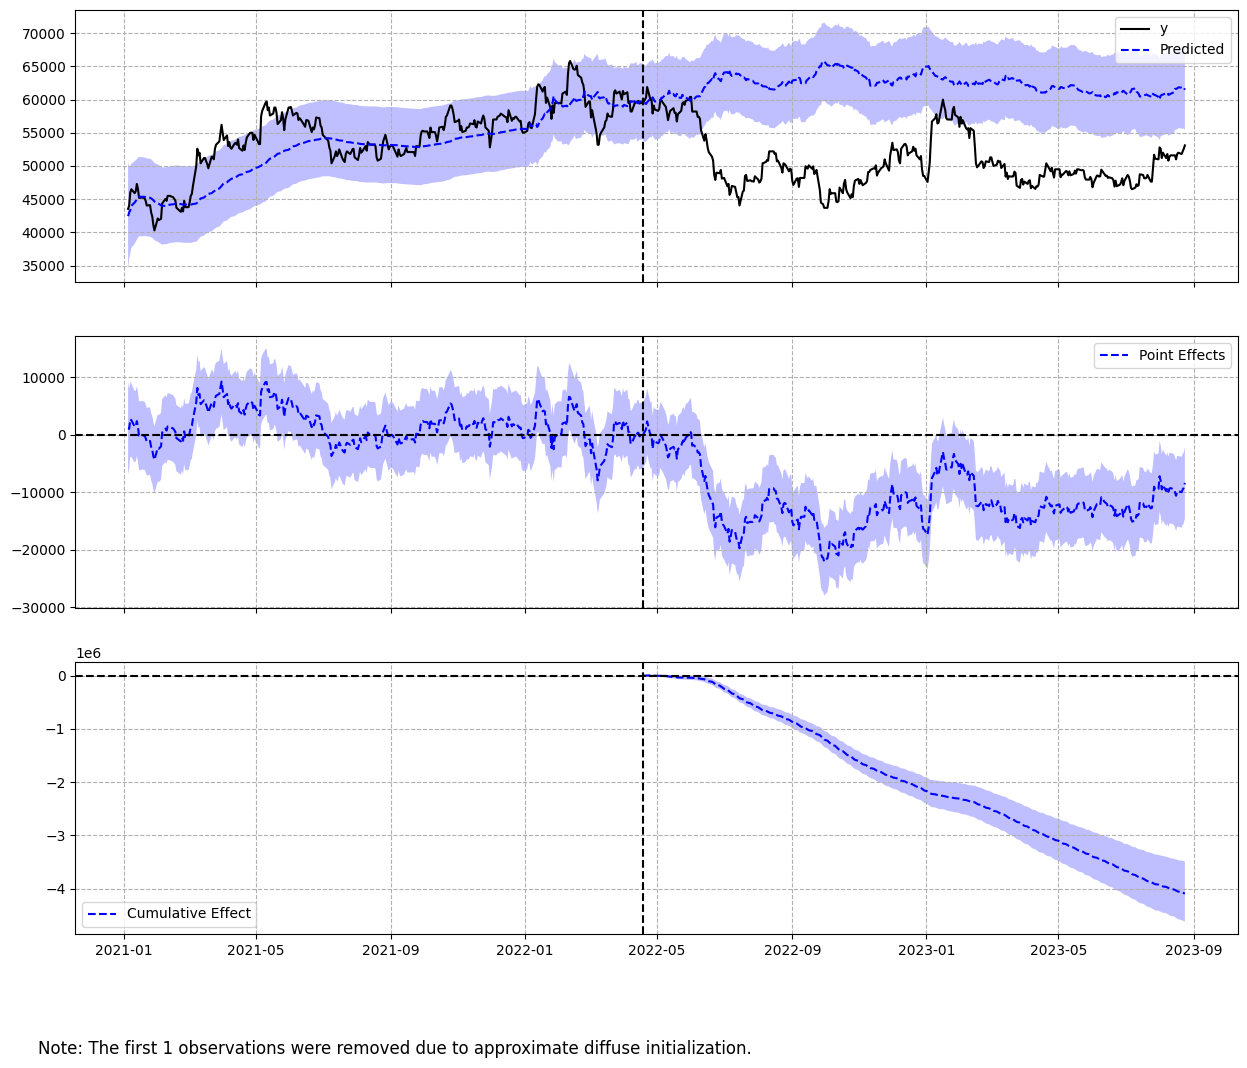

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12291.22           4338800.0
Prediction (s.d.)         15773.92 (252.81)  5568195.04 (89242.31)
95% CI                    [15269.8, 16260.8] [5390239.74, 5740063.16]

Absolute effect (s.d.)    -3482.71 (252.81)  -1229395.04 (89242.31)
95% CI                    [-3969.58, -2978.58][-1401263.16, -1051439.74]

Relative effect (s.d.)    -22.08% (1.6%)     -22.08% (1.6%)
95% CI                    [-25.17%, -18.88%] [-25.17%, -18.88%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


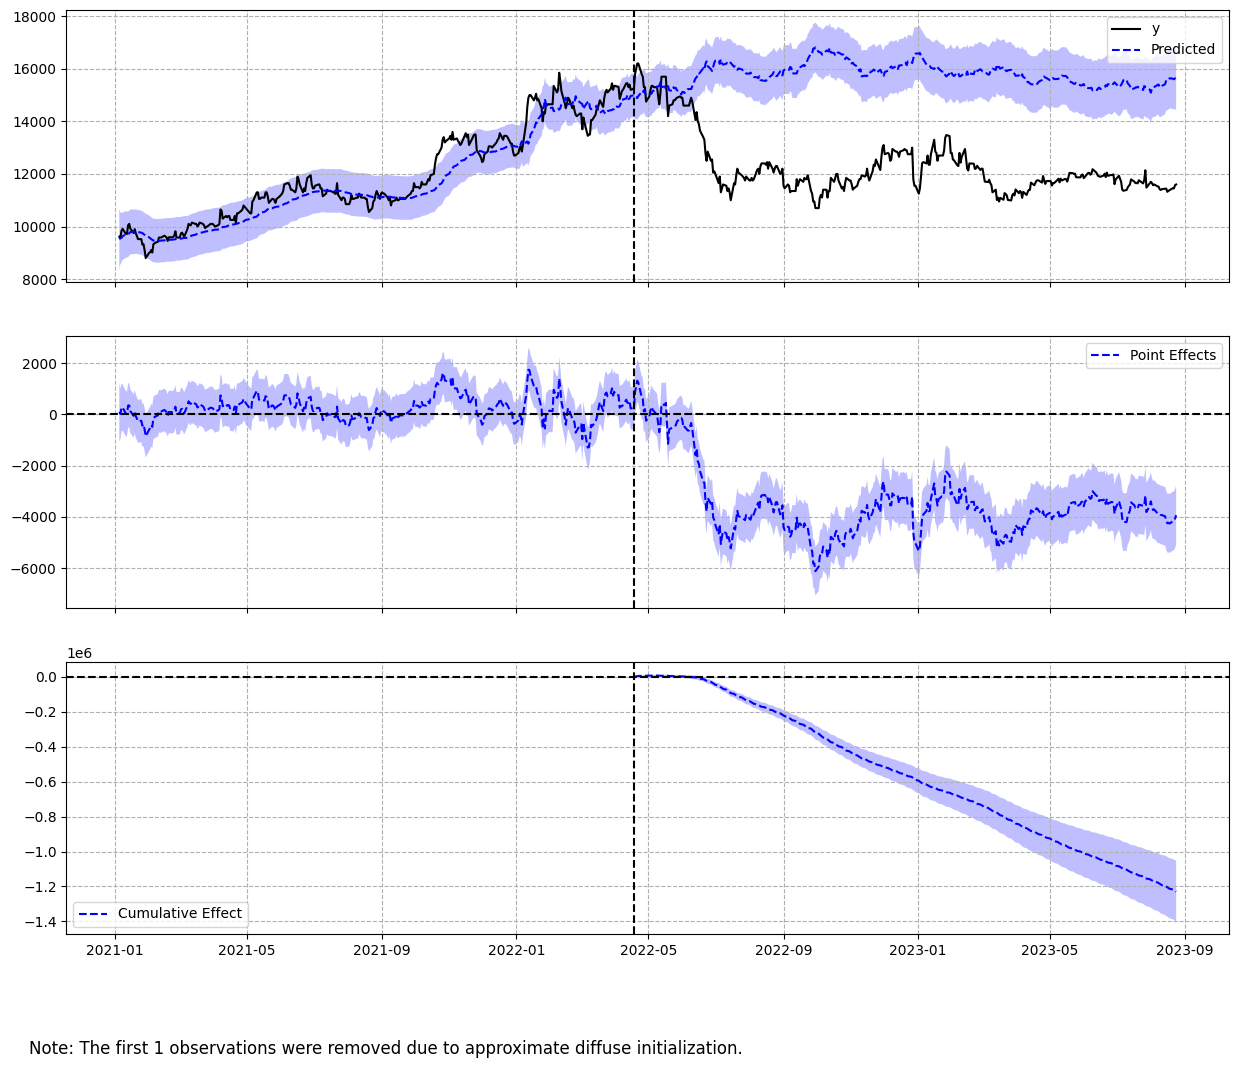

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41939.24           14804550.0
Prediction (s.d.)         50223.52 (554.85)  17728901.97 (195861.08)
95% CI                    [49143.92, 51318.88][17347803.29, 18115564.61]

Absolute effect (s.d.)    -8284.28 (554.85)  -2924351.97 (195861.08)
95% CI                    [-9379.64, -7204.68][-3311014.61, -2543253.29]

Relative effect (s.d.)    -16.49% (1.1%)     -16.49% (1.1%)
95% CI                    [-18.68%, -14.35%] [-18.68%, -14.35%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


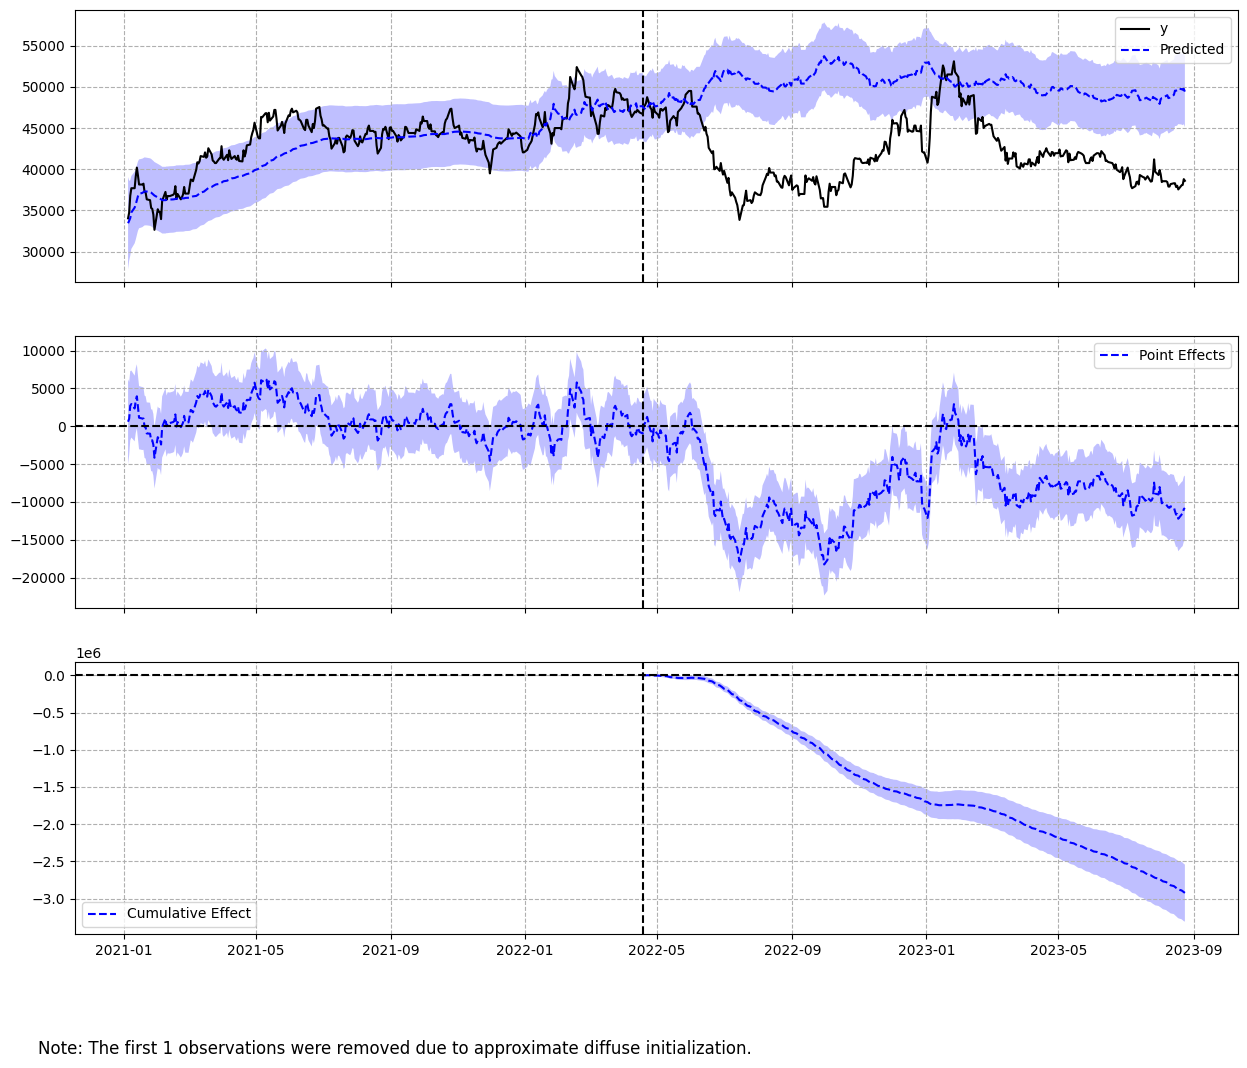

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    36985.98           13056050.0
Prediction (s.d.)         40303.99 (425.73)  14227309.34 (150284.42)
95% CI                    [39479.6, 41148.45][13936297.92, 14525402.03]

Absolute effect (s.d.)    -3318.02 (425.73)  -1171259.34 (150284.42)
95% CI                    [-4162.47, -2493.62][-1469352.03, -880247.92]

Relative effect (s.d.)    -8.23% (1.06%)     -8.23% (1.06%)
95% CI                    [-10.33%, -6.19%]  [-10.33%, -6.19%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


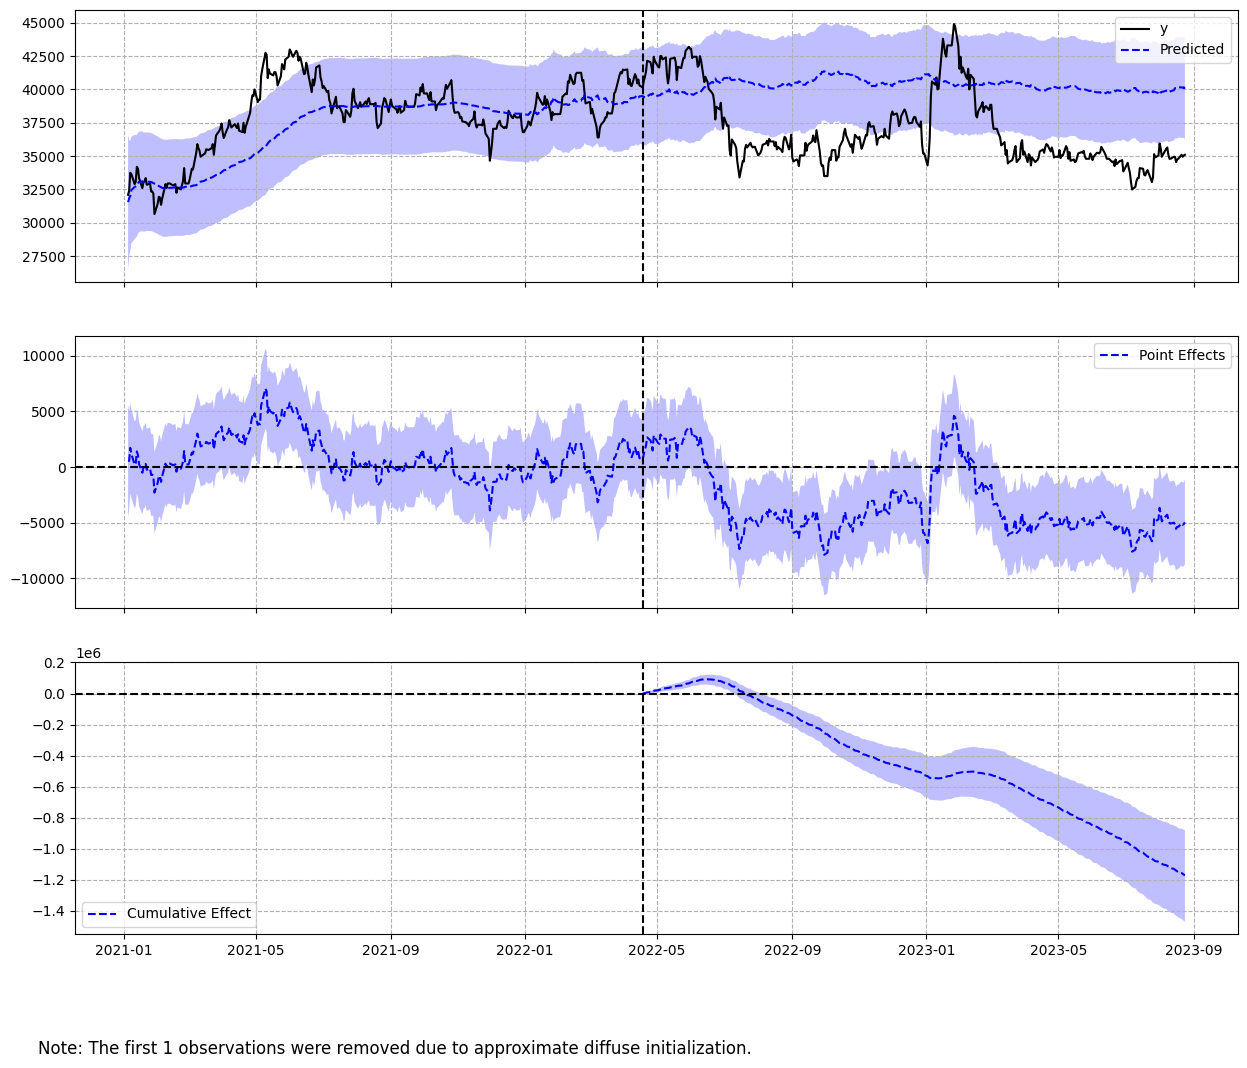

____________________________________________________________________________________________________


In [24]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            cl = pd.DataFrame(row).join(x, how='left')
        ci_c = CausalImpact(cl, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [25]:
# 미 연준 빅스텝
pre_period = ['2021-01-04', '2022-07-27']
post_period = ['2022-07-28', today]

In [26]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-2774.39%,-5.27%,0.0
우리,-777.45%,-6.13%,0.0
하나,-734.97%,-1.74%,0.09
신한,-2505.14%,-6.46%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    49845.55           14006600.0
Prediction (s.d.)         52619.94 (805.59)  14786203.68 (226370.89)
95% CI                    [51053.72, 54211.58][14346095.89, 15233453.46]

Absolute effect (s.d.)    -2774.39 (805.59)  -779603.68 (226370.89)
95% CI                    [-4366.03, -1208.17][-1226853.46, -339495.89]

Relative effect (s.d.)    -5.27% (1.53%)     -5.27% (1.53%)
95% CI                    [-8.3%, -2.3%]     [-8.3%, -2.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


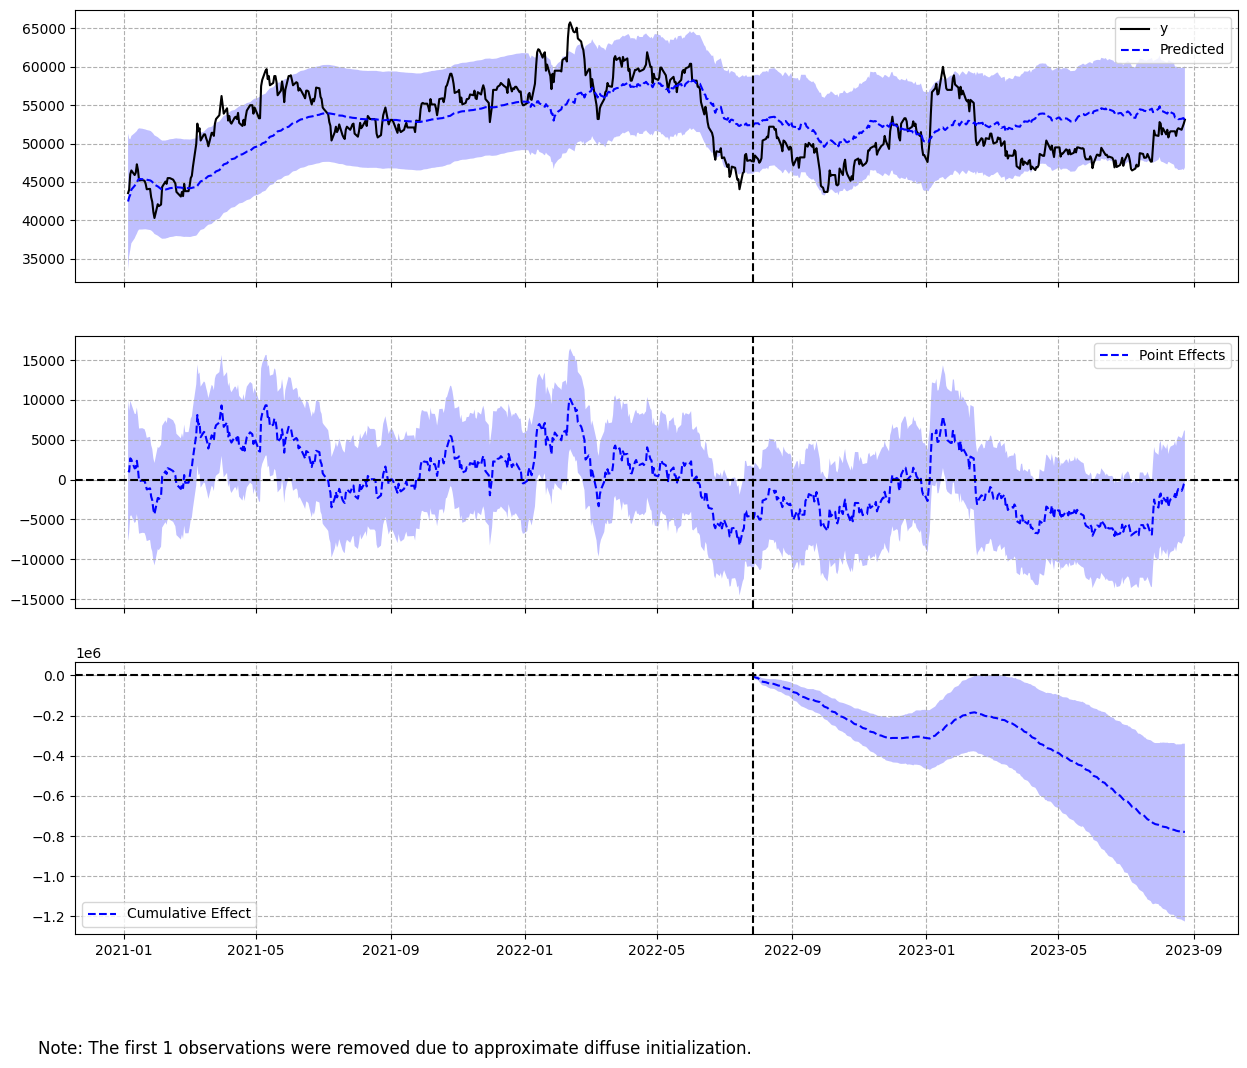

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11898.93           3343600.0
Prediction (s.d.)         12676.38 (249.92)  3562063.51 (70228.72)
95% CI                    [12203.51, 13183.19][3429185.71, 3704477.24]

Absolute effect (s.d.)    -777.45 (249.92)   -218463.51 (70228.72)
95% CI                    [-1284.26, -304.58][-360877.24, -85585.71]

Relative effect (s.d.)    -6.13% (1.97%)     -6.13% (1.97%)
95% CI                    [-10.13%, -2.4%]   [-10.13%, -2.4%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.8%

For more details run the command: print(impact.summary('report'))


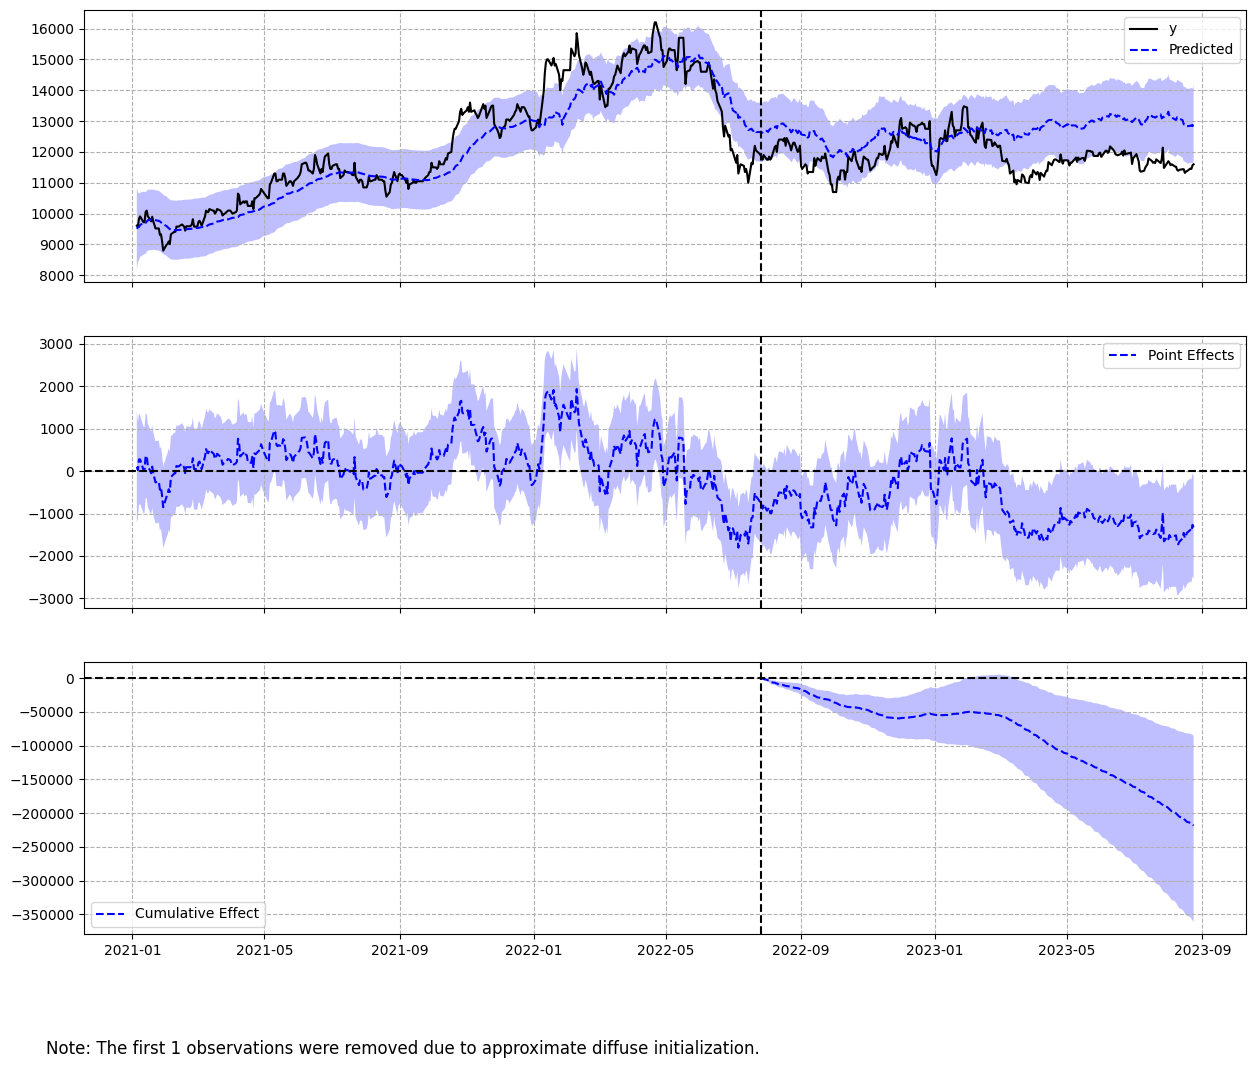

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41583.45           11684950.0
Prediction (s.d.)         42318.42 (563.69)  11891476.71 (158396.74)
95% CI                    [41186.14, 43395.76][11573304.46, 12194208.29]

Absolute effect (s.d.)    -734.97 (563.69)   -206526.71 (158396.74)
95% CI                    [-1812.31, 397.32] [-509258.29, 111645.54]

Relative effect (s.d.)    -1.74% (1.33%)     -1.74% (1.33%)
95% CI                    [-4.28%, 0.94%]    [-4.28%, 0.94%]

Posterior tail-area probability p: 0.11
Posterior prob. of a causal effect: 89.11%

For more details run the command: print(impact.summary('report'))


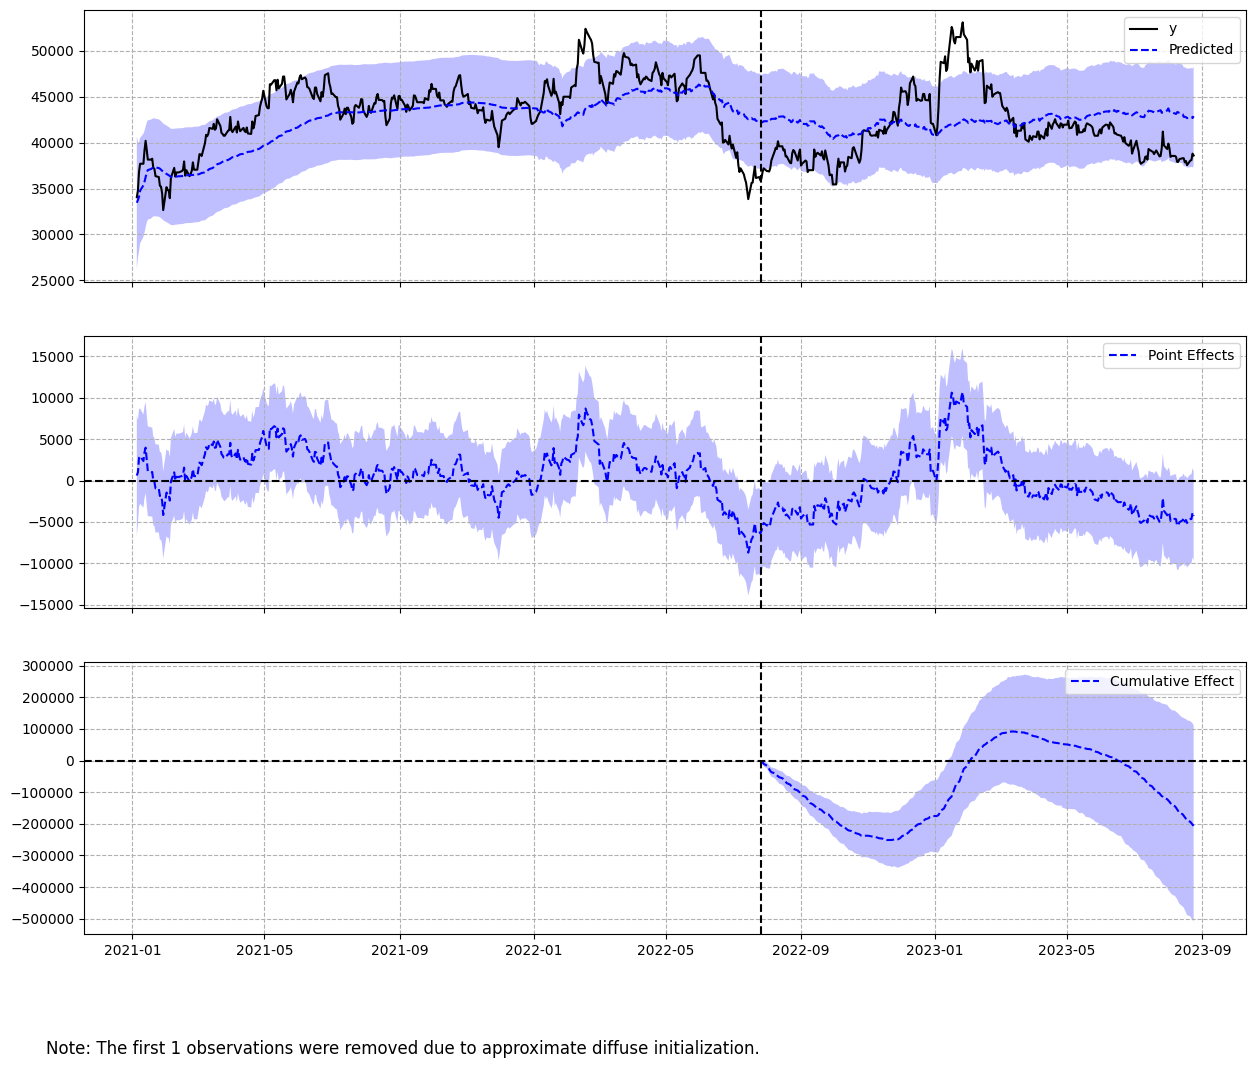

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    36270.28           10191950.0
Prediction (s.d.)         38775.42 (419.67)  10895894.22 (117926.67)
95% CI                    [37962.45, 39607.52][10667448.62, 11129712.66]

Absolute effect (s.d.)    -2505.14 (419.67)  -703944.22 (117926.67)
95% CI                    [-3337.23, -1692.17][-937762.66, -475498.62]

Relative effect (s.d.)    -6.46% (1.08%)     -6.46% (1.08%)
95% CI                    [-8.61%, -4.36%]   [-8.61%, -4.36%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


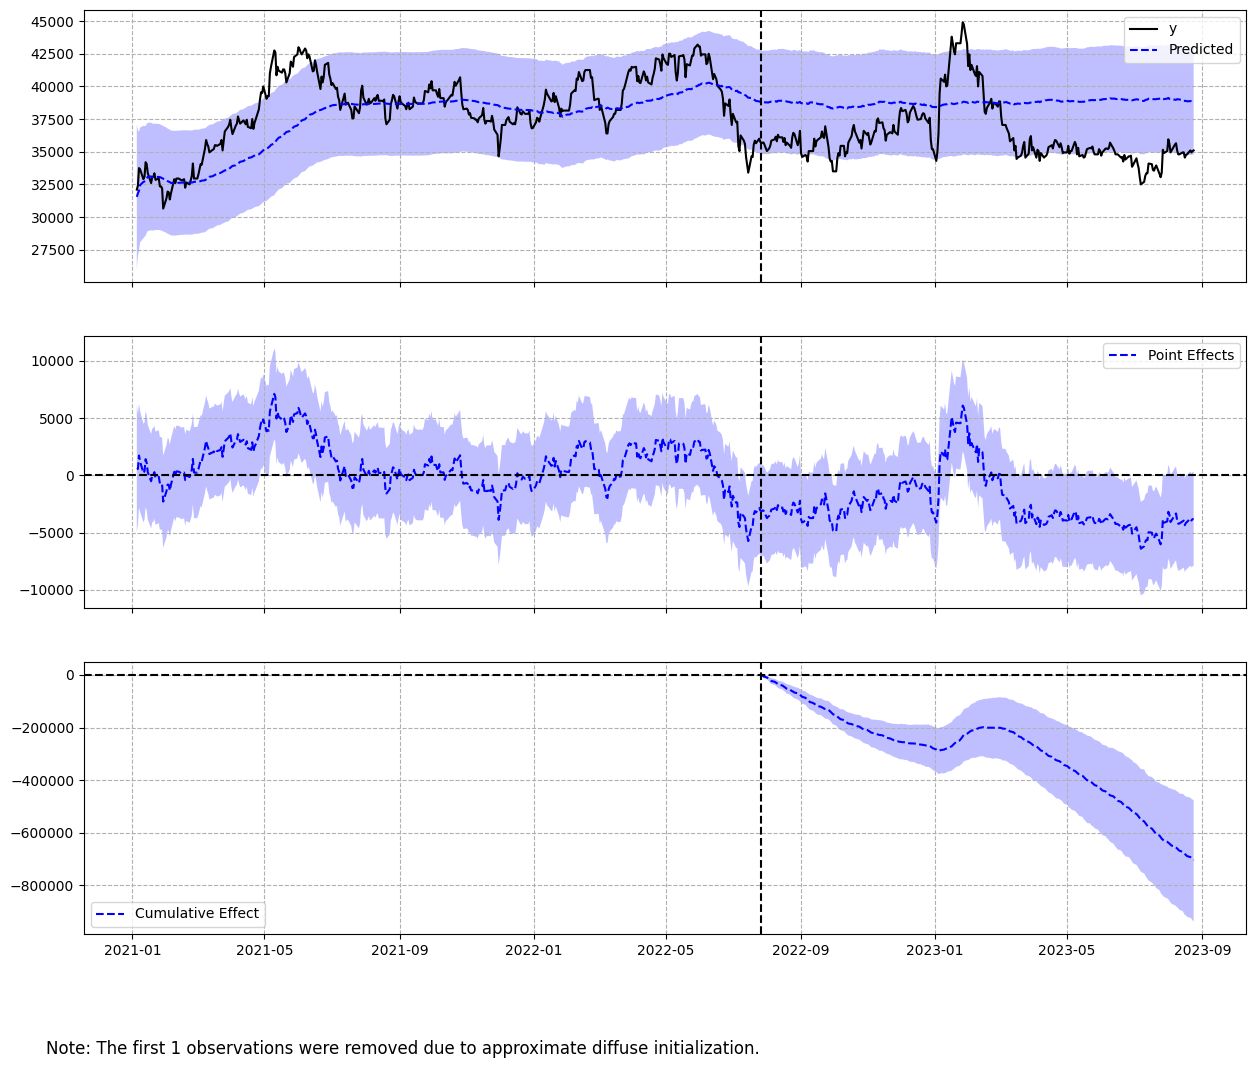

____________________________________________________________________________________________________


In [27]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            cl = pd.DataFrame(row).join(x, how='left')
        ci_c = CausalImpact(cl, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [28]:
'''for index, row in merged_df.iteritems():
    try:
        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})
        print(index)
        print(ci_o.summary())
        ci_o.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)'''

"for index, row in merged_df.iteritems():\n    try:\n        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})\n        print(index)\n        print(ci_o.summary())\n        ci_o.plot()\n        print('____________________________________________________________________________________________________')\n    except ValueError as e:\n        print(e)"